# Projekt 
V tejto časti si ukážeme ako by vyzeral malý projket dátovej analýzy nad datasetom domov, ktorý používame. 

V tomto projekte púredpokladáme, že vedenie nám nepodá detailné informácie o dátach

## 01 Načítanie datasetu
V tejto časti načítame všetky súbory ktoré máme

In [1]:
import pandas as pd
import numpy as np 
import glob

DATASET_LOCATION="dataset/"

In [2]:
# Pro tip: pomocou kniznice glob viem najst vsetky vsc subory v priecinku
glob.glob(DATASET_LOCATION + "*.csv")

['dataset\\test.csv', 'dataset\\timestamps_dataset.csv', 'dataset\\train.csv']

In [5]:
files = ['dataset\\test.csv', 'dataset\\train.csv']

df_list=[]

for file in files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, axis=0, ignore_index=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [6]:
# data check
print(df.shape) # skontrolovat rozmer
df.index # skontrolovat index

(2919, 81)


RangeIndex(start=0, stop=2919, step=1)

In [7]:
df.Id.value_counts() # kontroloa stlpca Id ... pre potencial noveho indexu

1461    1
481     1
483     1
484     1
485     1
       ..
2436    1
2437    1
2438    1
2439    1
1460    1
Name: Id, Length: 2919, dtype: int64

In [8]:
df.set_index("Id", drop=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


# 02 Kontrola dátových typov stĺpcov 
Ciel identifikovat s akými stĺpcami pracujeme

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [10]:
#string_columns=df.dtypes.loc[df.dtypes==np.object].index_to_list()
#numerical_columns=df.dtypes.loc[df.dtypes!=np.object].index.to_list()

string_columns=df.dtypes.loc[df.dtypes == 'object'].index.to_list() # POZOR takymto sposobom je mozne ze sa medzi string columns pripletu aj datetime columns preto treba vzdy skontrolovat
numerical_columns=df.dtypes.loc[~(df.dtypes == 'object')].index.to_list() 

In [11]:
#df.loc[:, numerical_columns].head()
df.loc[:, numerical_columns].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,NaN
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,NaN
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,NaN
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,NaN
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,NaN


In [12]:
df.loc[:, string_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# 03 Analýza NaN hodnôt
Nasledujúcom kroku sa pozreme na NaN hodnoty. Este ich nemazeme!!!

In [13]:


# nan_counts=df.isna().sum() 
# nan_counts_sorted=nan_counts.loc[nan_counts>0].sort_values(ascending=False).to_frame(name="counts")
# nan_counts_sorted["percentage"] = (nan_counts_sorted.counts*100)/df.shape[0]
# nan_counts_sorted

nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts>0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"] = (nan_counts_sorted.counts*100)/df.shape[0]

nan_counts_sorted

,counts,percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


***Záver***: Niektoré zo stĺpcov obsahujú viac ako 99% Nan hodnôt. Dané stĺce nemusia mať zmysel.

# 04 Analýza údajov bez cieľa
V takomto prípade sa snažíme niečo zistiť o dátach bez reálneho cieľa

In [14]:
df.loc[:, numerical_columns].describe()
# Kedze je dataframe prilis velky mozeme si ho ulozit do csv a nalyzovat tam podobne ako v predchadzajucej lekcii

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
df.loc[:, string_columns].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


# 05 Explorativna analýza kľúčového stĺpca
Vo väčšine prípadov sa stretneme so scenárom analýzy zameranej na konkrétnu premennú ukážme si to na SalePrice premennej

In [16]:
df.SalePrice.isna().sum() # je to tak preto levo test subor neobsahuje SalePrice

1459

In [17]:
df = df.loc[df.SalePrice.notna(),:]
df = df.loc[df.SalePrice.notna(), :]
df.shape

(1460, 81)

<AxesSubplot: >

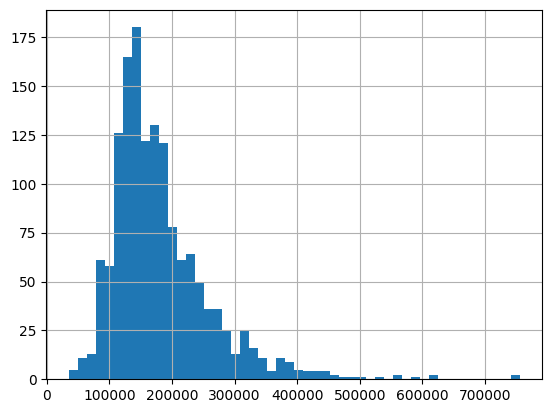

In [18]:
# Aby sme mali nejaku predstavu o klucovom stlpci
df.SalePrice.hist(bins=50)

## 05.1 Meranie vplyvu inych stlpcov pomocou korelacie
Korelacia hovorim o tom aky vplyv na zmenu jedneho stlpca ma iny stlpec. Rozhoduje co najvyssia ***absolutna hodnota***

In [31]:
# defaultne pearson  corr koef
# alternativy su spearman a kendal, ktore vedia lepsie pracovat s outlayermi

df.corr()['SalePrice'].sort_values()

corr_df=pd.DataFrame()
corr_df["pearson"]=df.corr(method="pearson")['SalePrice'].sort_values()
corr_df["spearman"]=df.corr(method="spearman")['SalePrice']
corr_df["kendall"]=df.corr(method="kendall")['SalePrice']
corr_df

# df.corr()['SalePrice'].sort_values()
# corr_df=pd.DataFrame()
# corr_df["pearson"]=df.corr(method="pearson")['SalePrice'].sort_values()
# corr_df["kendall "]=df.corr(method="kendall")['SalePrice'].sort_values()
# corr_df["spearman "]=df.corr(method="spearman")['SalePrice'].sort_values()
# corr_df

,pearson,spearman,kendall
KitchenAbvGr,-0.135907,-0.164826,-0.134718
EnclosedPorch,-0.128578,-0.218394,-0.172094
MSSubClass,-0.084284,0.007192,-0.003979
OverallCond,-0.077856,-0.129325,-0.103492
YrSold,-0.028923,-0.029899,-0.021796
LowQualFinSF,-0.025606,-0.067719,-0.055308
Id,-0.021917,-0.018546,-0.012030
MiscVal,-0.021190,-0.062727,-0.050917
BsmtHalfBath,-0.016844,-0.012189,-0.009962
BsmtFinSF2,-0.011378,-0.038806,-0.030710


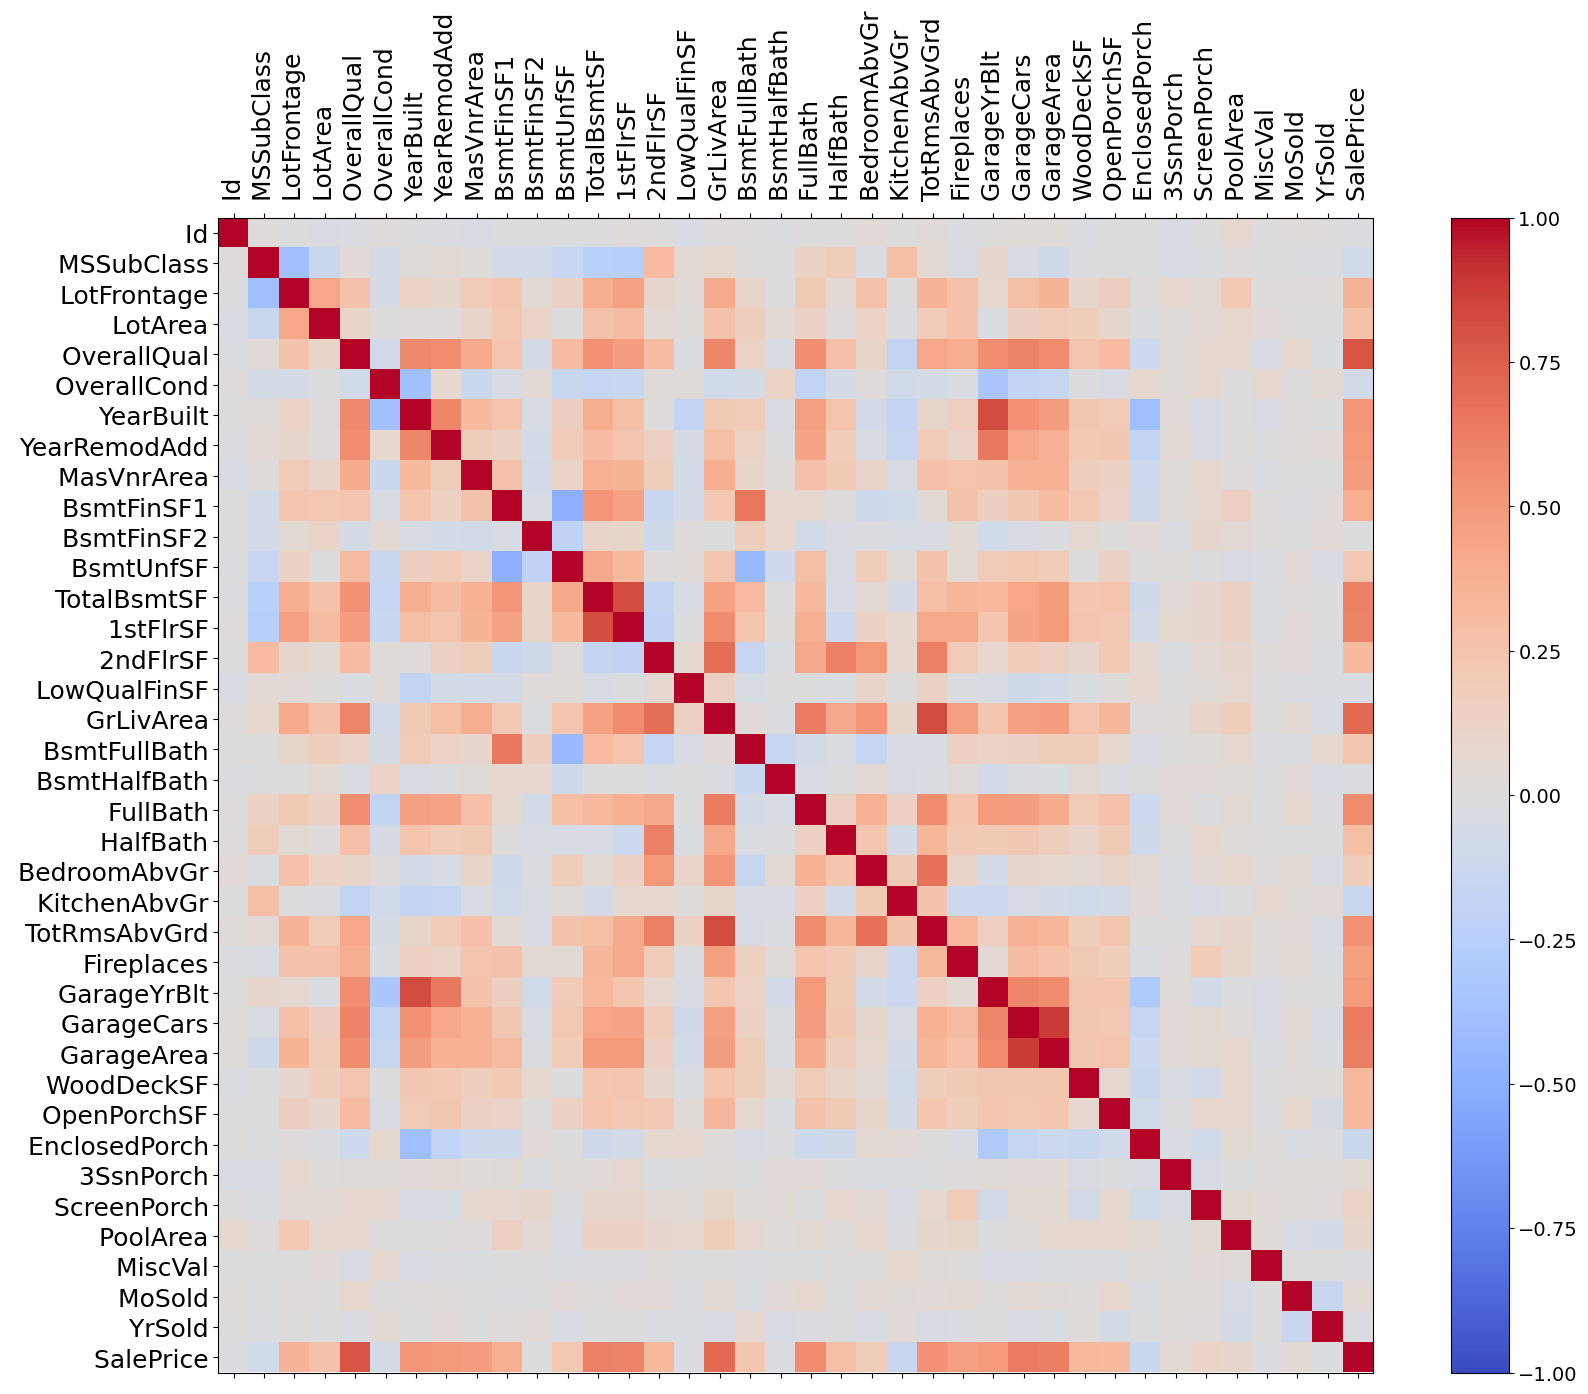

In [21]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,numerical_columns]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

## 05.3 Meranie vplyvu textovych stlpcov pomocou boxplotu

In [22]:
string_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MSZoning'>

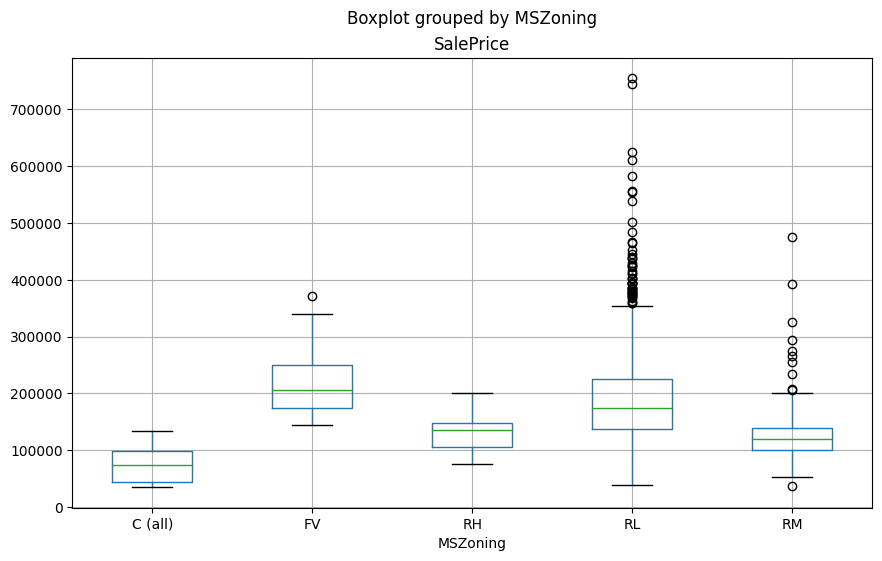

In [23]:
plt.rcParams['figure.figsize'] = 10, 6
dic = {"size": 10}
matplotlib.rc('font', **dic)

df.boxplot(column=["SalePrice"], by="MSZoning")

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Street'>

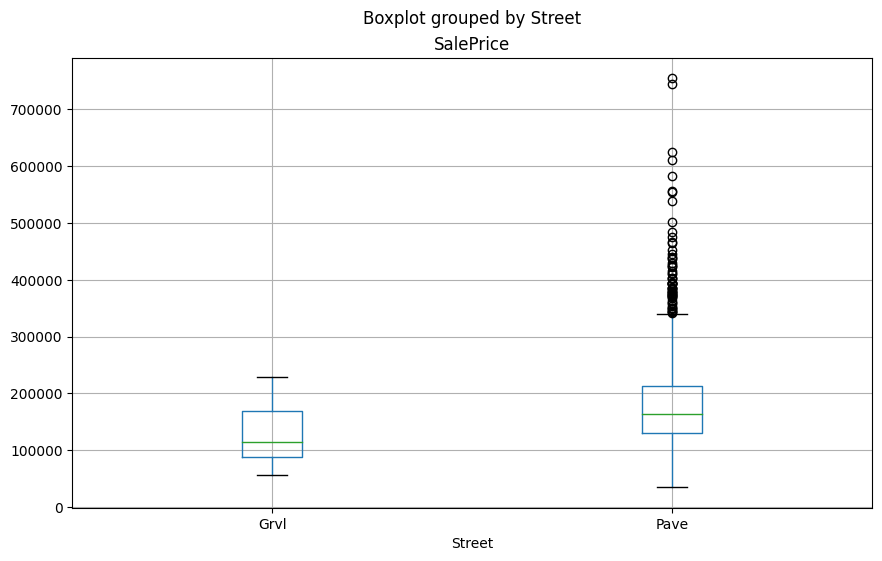

In [24]:
df.boxplot(column=["SalePrice"], by="Street")

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='SaleCondition'>

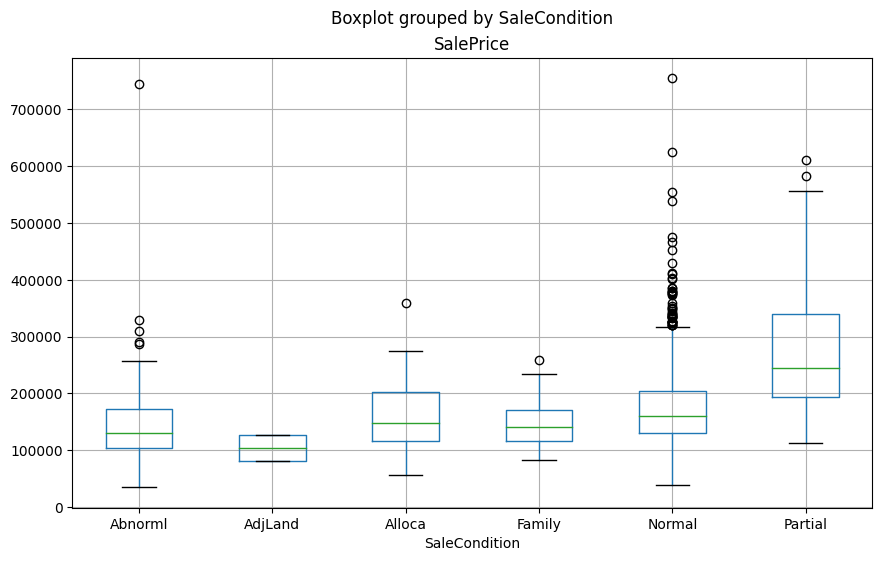

In [25]:
df.boxplot(column=["SalePrice"], by="SaleCondition")

## 05.3 Meranie vplyvu kombinacie stlpcov pomocou scatterplotu
Na pomoc si volame kniznicu seaborn postavenu nad kniznicou matplotlib
```
pip install seaborn
```

In [26]:
numerical_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
# Id a ms subclass su kategoricke atributy podobne ako OverallQual, OverallCond
df.loc[df.SalePrice.notna() ,["GarageArea", "LotArea", "PoolArea", "YrSold", "SalePrice"]]

,GarageArea,LotArea,PoolArea,YrSold,SalePrice
1459,548.0,8450,0,2008,208500.0
1460,460.0,9600,0,2007,181500.0
1461,608.0,11250,0,2008,223500.0
1462,642.0,9550,0,2006,140000.0
1463,836.0,14260,0,2008,250000.0
...,...,...,...,...,...
2914,460.0,7917,0,2007,175000.0
2915,500.0,13175,0,2010,210000.0
2916,252.0,9042,0,2010,266500.0
2917,240.0,9717,0,2010,142125.0


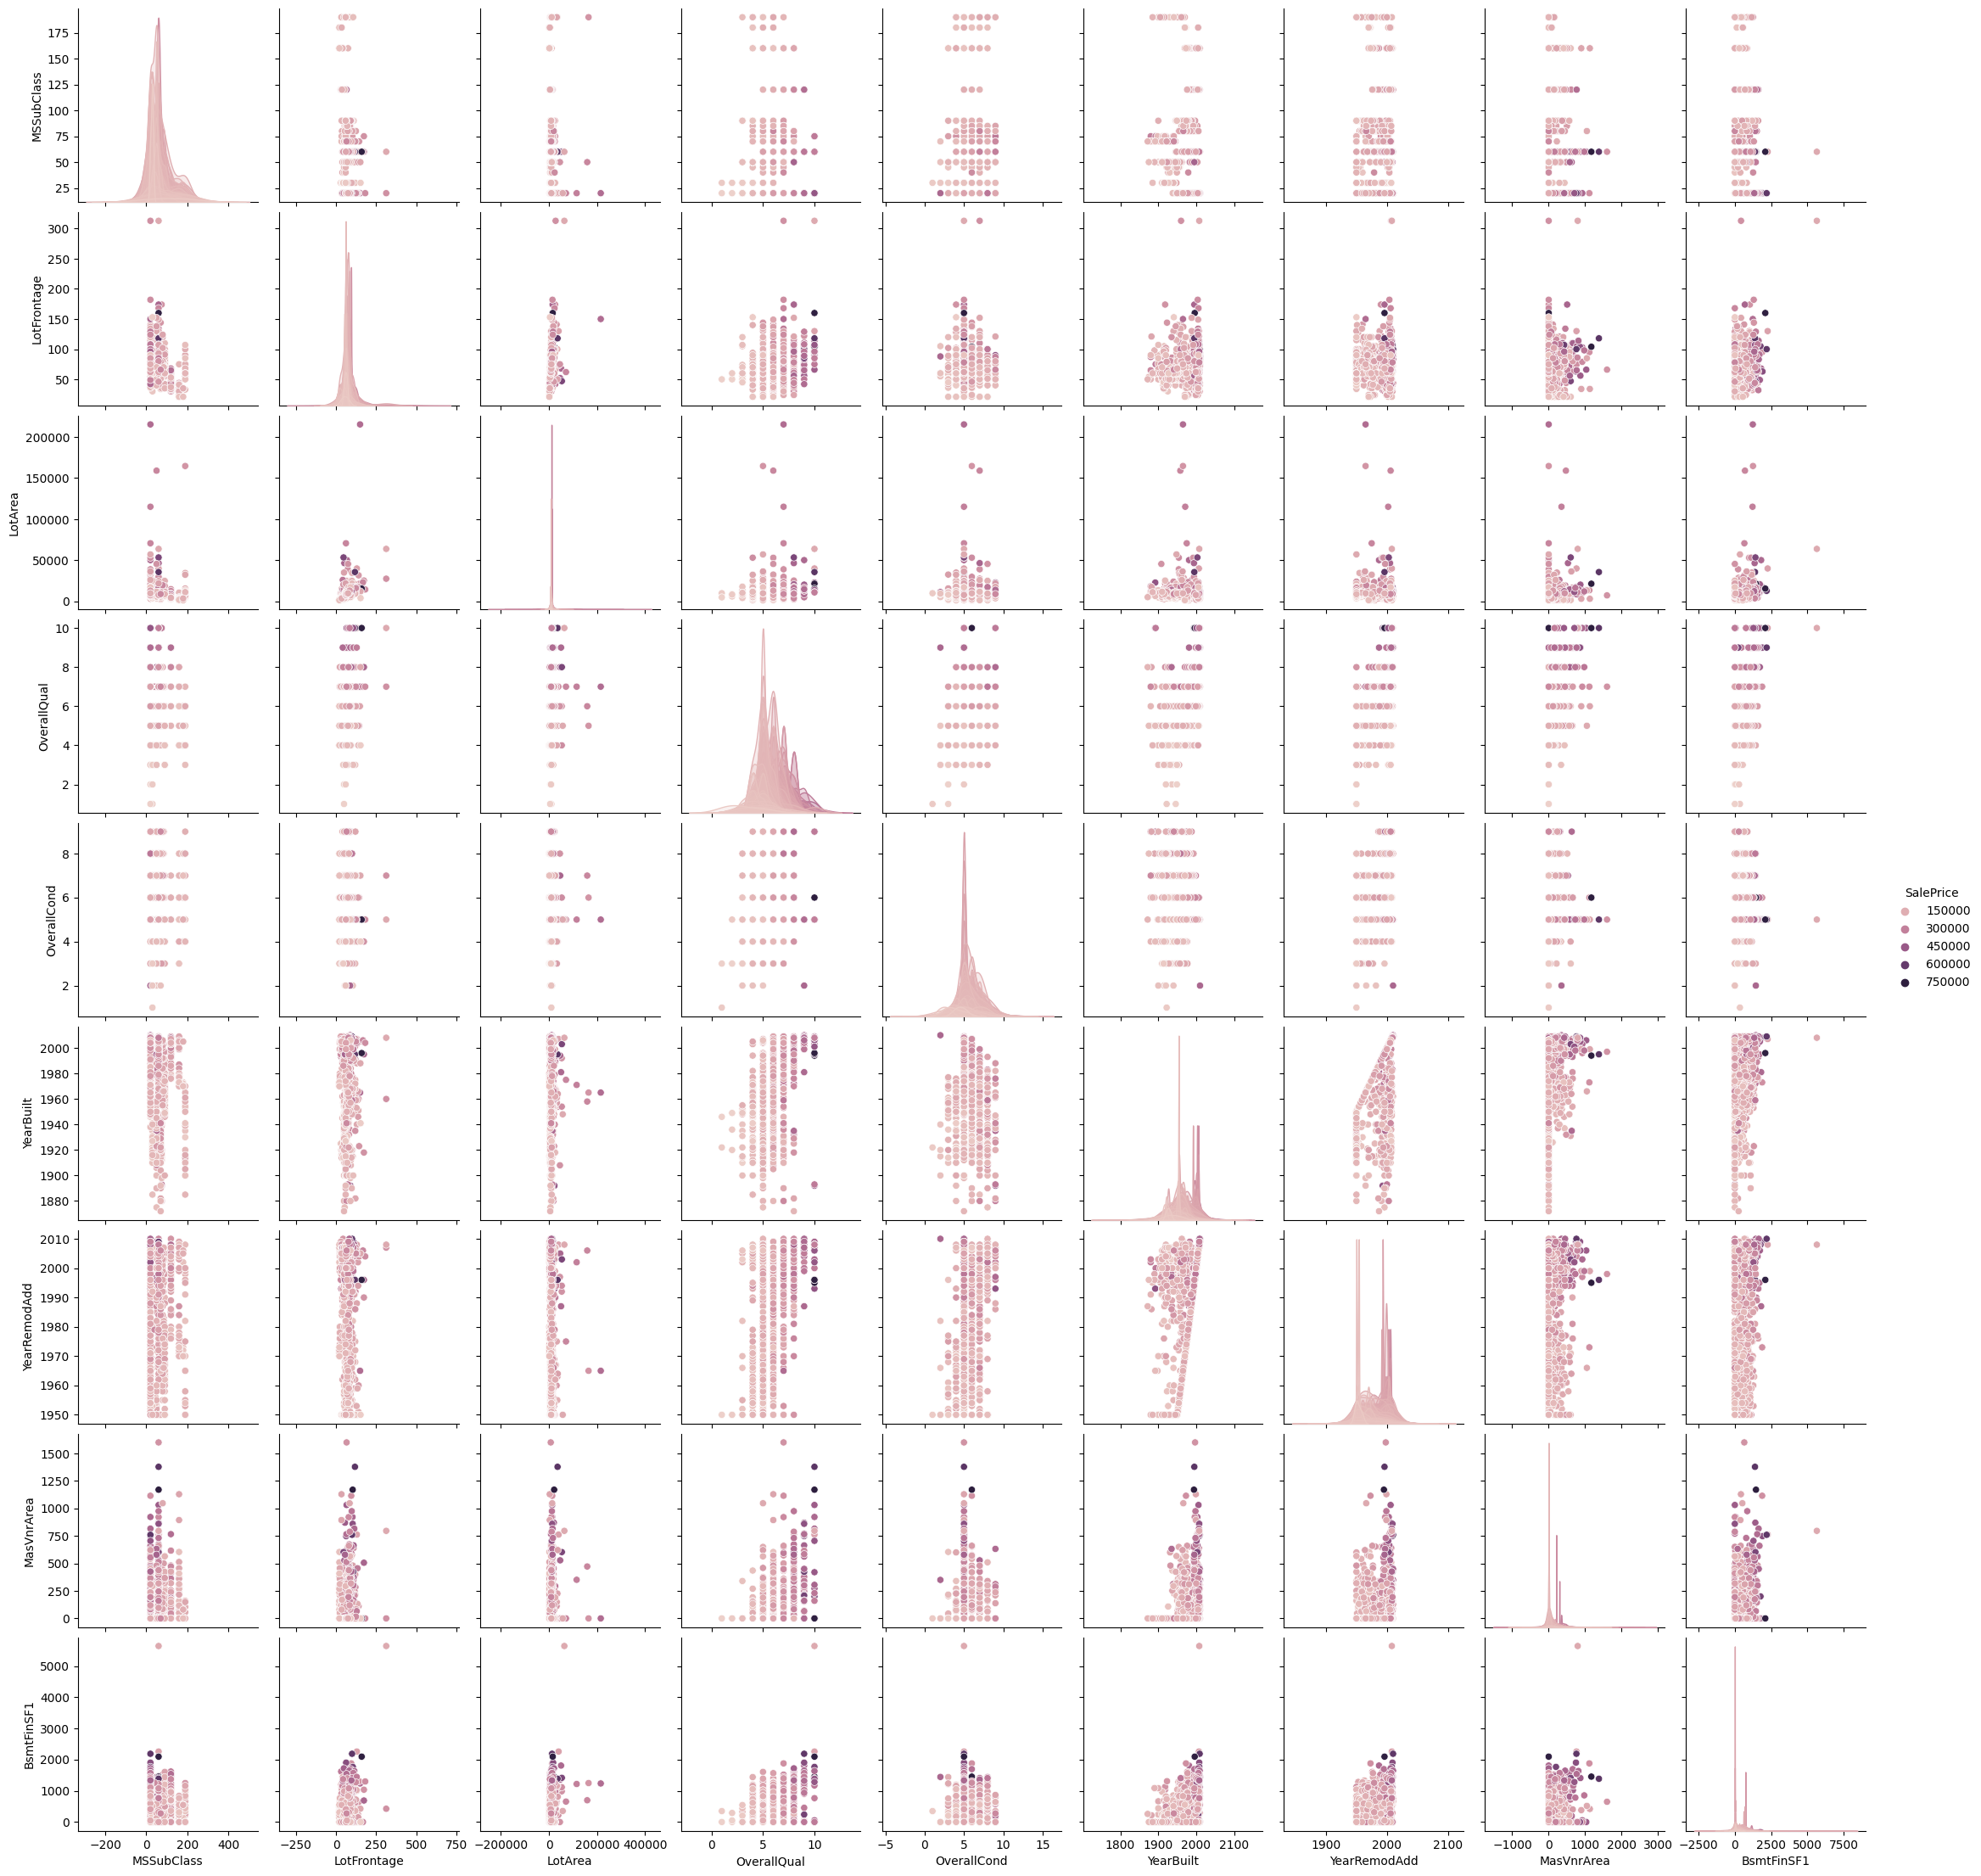

In [28]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

# pip install seaborn

df_numeric = df.loc[df.SalePrice.notna() ,numerical_columns[1:10] + ["SalePrice"]]
sns.pairplot(df_numeric, hue='SalePrice')

# Ďalšie možnosti analýzy 
- analýza outlierov 
- analyza podobných nákupov 
- analyza trendov

Vsetko je o citani grafov a dát.